# KS analysis


In [69]:
import mlrose
import numpy as np
import pandas as pd
from time import time
import os
from tqdm import tqdm

from itertools import product
from matplotlib import pyplot as plt
from math import *

In [61]:
def imax(l):
    pos = 0
    max_val = 0
    for i in range(len(l)) :
        if l[i] > max_val :
            pos = i
            max_val = l[i]
    return(max_val, i)

In [62]:
## Saving parameters
dir_="results/plot/"

results_dir='./results'
plot_dir='./data/plot'

if not os.path.exists(dir_):
    os.makedirs(dir_)

    
    
max_iter_list=[10, 20, 50,100,200]
state_size = 50

nb_restarts_list=[5,10,15,20,25,30,35,40,45,50]

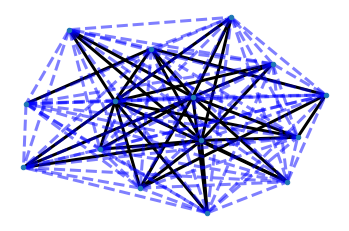

In [88]:
import networkx as nx
G=nx.Graph()

vertex = range(15)
G.add_nodes_from(vertex)


# Erdos Renyi graph
p = 0.30
max_pos = 100
edges=[]
cities = []
for i in vertex :
    x = max_dist * np.random.random()
    y = max_dist * np.random.random()
    cities.append([x,y])
for i in vertex :
    for j in vertex :
        if i!=j:
            d = sqrt((cities[i][0]-cities[j][0])**2 + (cities[i][1]-cities[j][1])**2)
            edges.append((i,j,d))
            G.add_edge(i,j,weight=d)
            
             
    


elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] > max_dist/2]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] <= max_dist/2]

pos = nx.spring_layout(G)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(G, pos, node_size=20)

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge,
                       width=3)
nx.draw_networkx_edges(G, pos, edgelist=esmall,
                       width=3, alpha=0.5, edge_color='b', style='dashed')


plt.axis('off')
plt.show()


In [167]:
length = 20
scale_v = 10
scale_w = 10



weights = [scale_w * np.random.random() for i in range(length)]

values = [scale_v * np.random.random() for i in range(length)]
max_weight_pct = 0.35 #default value


In [ ]:


## Hill climbing

hill_climb_best_state=[]
hill_climb_best_fit=[]
hill_climb_curve=[]
hill_climb_time=[]
threshold_param_list=range(0,10)
print("Random Hill Climbing")

for threshold, nb_restarts in tqdm(product(threshold_param_list,nb_restarts_list)):
        for iters in max_iter_list:
            fn = mlrose.Knapsack(weights, values, max_weight_pct)
            state=np.random.randint(0,2,size=state_size)
            problem_fit = mlrose.DiscreteOpt(length = length, fitness_fn = fn, max_val = 3*scale_w)
            start=time()
            best_state, best_fitness, curve = mlrose.random_hill_climb(problem_fit, 
                                                                   restarts=nb_restarts,
                                                                   max_attempts = 500, 
                                                                   max_iters=int(iters), curve=True)
            end=time()
            hill_climb_time.append(end-start)
            hill_climb_best_state.append(best_state)
            hill_climb_best_fit.append(best_fitness)
            hill_climb_curve.append(curve)


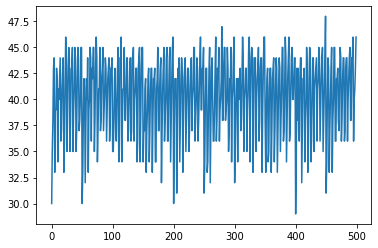

In [5]:
plt.plot(hill_climb_best_fit)

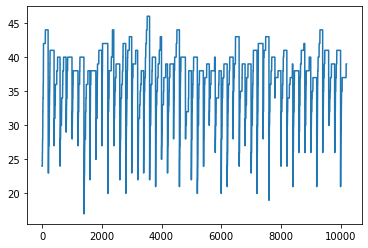

In [6]:
plt.plot(curve)

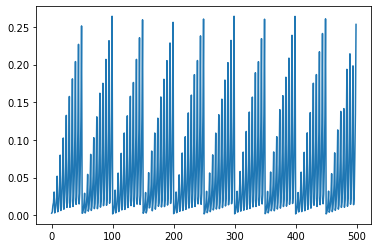

In [28]:
plt.plot(hill_climb_time)

In [336]:
## Hill climbing

nb_restarts_list=[10,50,100,200]
hill_climb_best_state=[]
hill_climb_best_fit=[]
hill_climb_curve=[]
hill_climb_time=[]
threshold_param_list=[0.5]
print("Random Hill Climbing")

for threshold, nb_restarts in tqdm(list(
    product(threshold_param_list,nb_restarts_list))):
        for iters in max_iter_list:
            fn=mlrose.FourPeaks(t_pct=threshold/10)
            state=np.random.randint(0,2,size=state_size)
            problem_fit=mlrose.DiscreteOpt(state_size, fn)
            start=time()
            best_state, best_fitness, curve = mlrose.random_hill_climb(problem_fit, 
                                                                   restarts=nb_restarts,
                                                                   max_attempts = 500, 
                                                                   max_iters=int(iters), curve=True)
            end=time()
            hill_climb_time.append(end-start)
            hill_climb_best_state.append(best_state)
            hill_climb_best_fit.append(best_fitness)
            hill_climb_curve.append(curve)



  0%|          | 0/4 [00:00<?, ?it/s]

 25%|██▌       | 1/4 [00:00<00:00,  8.53it/s]

Random Hill Climbing




 50%|█████     | 2/4 [00:00<00:00,  4.47it/s]

 75%|███████▌  | 3/4 [00:01<00:00,  2.32it/s]

100%|██████████| 4/4 [00:03<00:00,  1.21it/s]


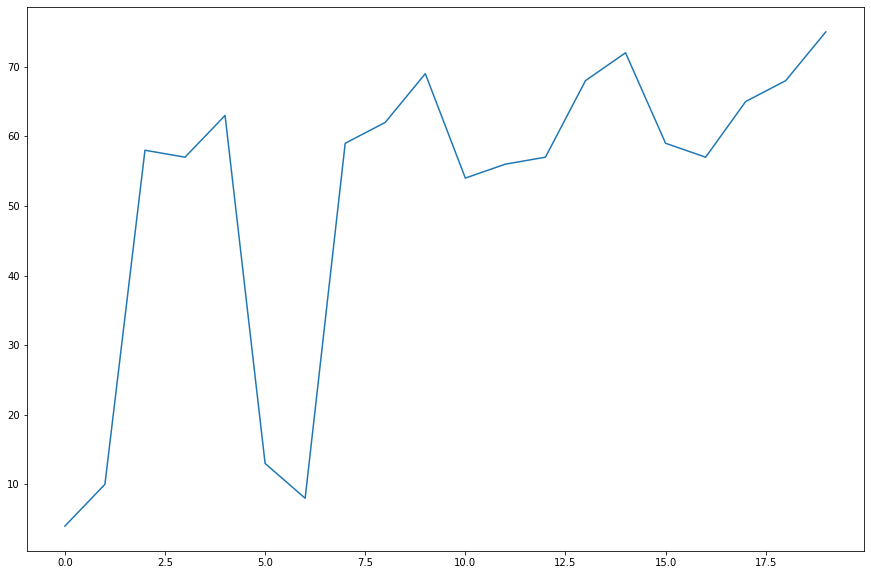

In [337]:
plt.plot(hill_climb_best_fit)
# plot time on the same axis

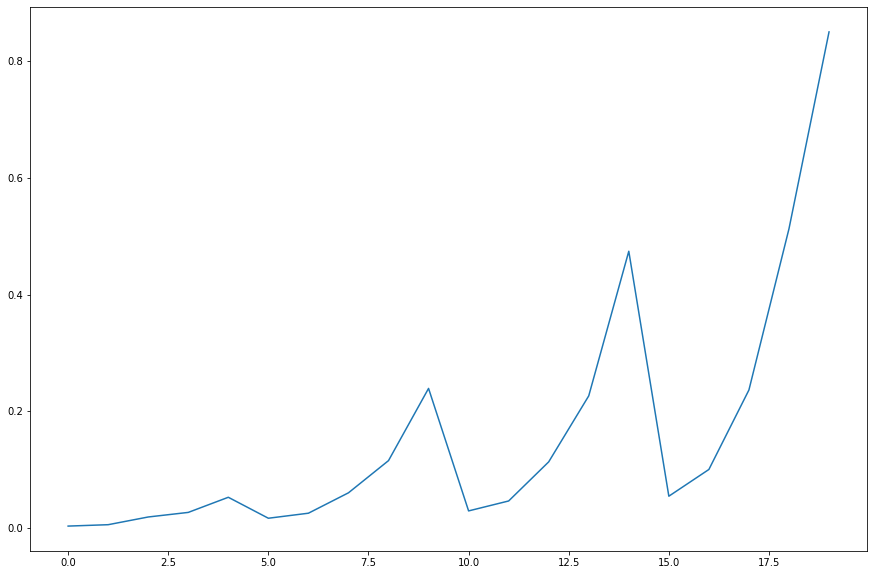

In [380]:
plt.plot(hill_climb_time)

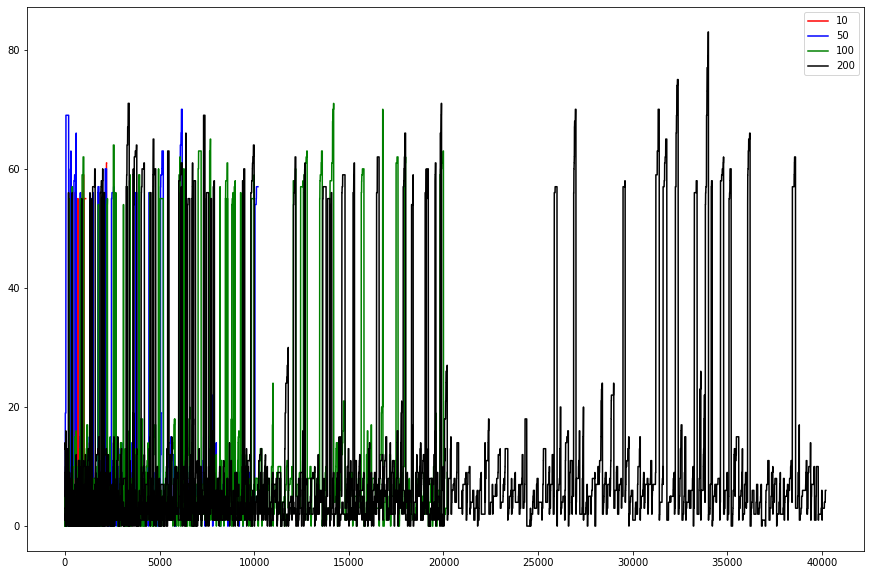

In [198]:
plt.rcParams["figure.figsize"] = (15,10)
color_list = ['red','blue', 'green','black']
no_duplicate = []
l= list(
    product(threshold_param_list,nb_restarts_list))
for i in range(len(hill_climb_curve)) :
    c = 0
    while l[int(i/len(max_iter_list))][1] != nb_restarts_list[c] :
        c+=1
    color = c/len(population_list)
    if c not in no_duplicate :
        plt.plot(hill_climb_curve[i], color = color_list[c], label=str(population_list[c]))
        no_duplicate.append(c)
    else : 
        plt.plot(hill_climb_curve[i], color = color_list[c])        
    
plt.legend()

# Results

In [200]:
result, i = imax(hill_climb_best_fit)

print("The best value found is ", result, " with state ",hill_climb_best_state[i])
print("The time required to find this result was ",hill_climb_time[i], "s")

The best value found is  83.0  with state  [1 1 1 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]
The time required to find this result was  0.849951982498169 s


In [207]:
## Standart testing
n_iteration = 10
durations = []
score = []

for i in (range(n_iteration)) :
            fn = mlrose.Knapsack(weights, values, max_weight_pct)
            state=np.random.randint(0,2,size=state_size)
            problem_fit = mlrose.DiscreteOpt(length = length, fitness_fn = fn, max_val = 2)
            start=time()
            best_state, best_fitness = mlrose.random_hill_climb(problem_fit, 
                                                                   restarts=200,
                                                                   max_attempts = 100, 
                                                                   max_iters=900)
            end=time()
            durations.append(end-start)
            score.append(best_fitness)
print("Average score : ", np.mean(score))
print("Average time :  ", np.mean(durations))



Average score :  61.37997610248423
Average time :   0.7988777875900268


In [208]:
hil_score = score
print(best_state)

[0 0 1 1 0 1 0 1 0 1 0 1 0 0 1 0 1 0 1 1]


## Genetic Algorithm

In [82]:
## Genetic Algorithm
population_list=[10,50, 100, 200]
mutation_probability_list=np.linspace(0.1,0.5,5)
genetic_best_state_list=[]
genetic_best_fit_list=[]
genetic_curve=[]
genetic_time=[]

In [52]:

for threshold, pops, pr in tqdm(list(product(threshold_param_list,population_list,mutation_probability_list))):
    for iters in (max_iter_list):
        fn=mlrose.FourPeaks(t_pct=threshold/10)
        state=np.random.randint(0,2,size=state_size)
        problem_fit=mlrose.DiscreteOpt(state_size, fn)
        
        start=time()
        best_state, best_fitness, curve = mlrose.genetic_alg(problem_fit,
                                                               mutation_prob = pr,
                                                               max_attempts = 500,
                                                               pop_size=pops,
                                                               max_iters=int(iters),
                                                               curve=True)
        end=time()
        genetic_time.append(end-start)
        genetic_best_state_list.append(best_state)
        genetic_best_fit_list.append(best_fitness)
        genetic_curve.append(curve)


NameError: name 'population_list' is not defined

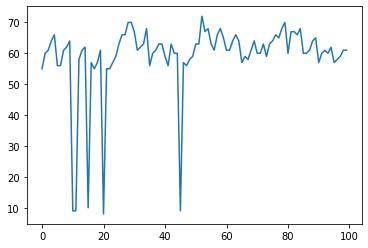

In [84]:
plt.plot(genetic_best_fit_list)

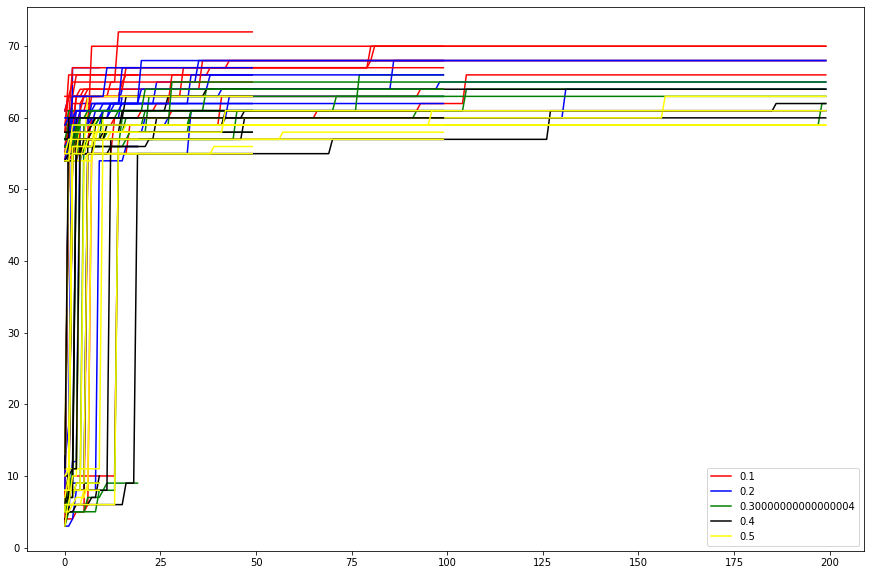

In [234]:
plt.rcParams["figure.figsize"] = (15,10)
color_list = ['red','blue', 'green','black','yellow']
no_duplicate = []
l= list(product(threshold_param_list,population_list,mutation_probability_list))
for i in range(len(genetic_curve)) :
    c = 0
    while l[int(i/len(max_iter_list))][2] != mutation_probability_list[c] :
        c+=1
    color = c/len(mutation_probability_list)
    if c not in no_duplicate :
        plt.plot(genetic_curve[i], color = color_list[c], label=str(mutation_probability_list[c]))
        no_duplicate.append(c)
    else : 
        plt.plot(genetic_curve[i], color = color_list[c])        
    
plt.legend()

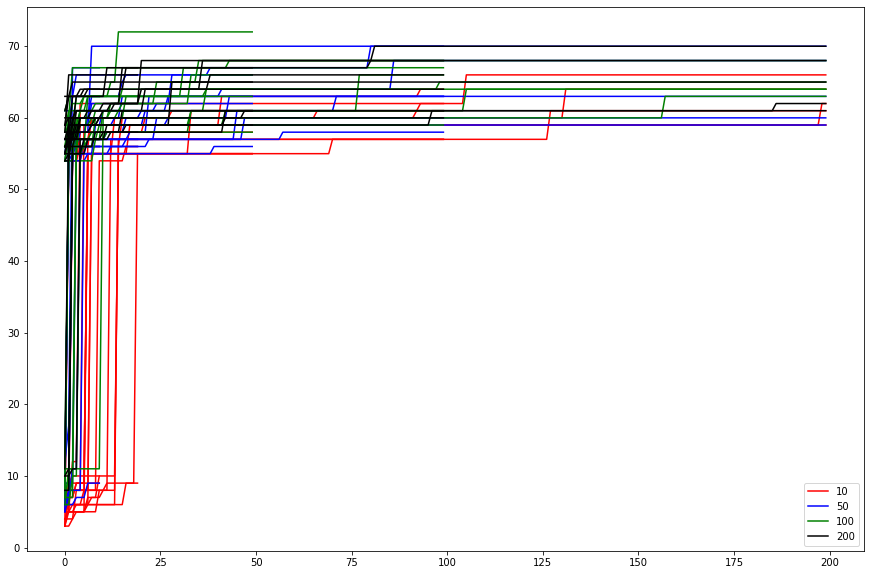

In [135]:
plt.rcParams["figure.figsize"] = (15,10)
color_list = ['red','blue', 'green','black']
no_duplicate = []
l= list(product(threshold_param_list,population_list,mutation_probability_list))
for i in range(len(genetic_curve)) :
    c = 0
    while l[int(i/len(max_iter_list))][1] != population_list[c] :
        c+=1
    color = c/len(population_list)
    if c not in no_duplicate :
        plt.plot(genetic_curve[i], color = color_list[c], label=str(population_list[c]))
        no_duplicate.append(c)
    else : 
        plt.plot(genetic_curve[i], color = color_list[c])        
    
plt.legend()

In [216]:
## Standart testing
n_iteration = 10
durations = []
score = []
for i in (range(n_iteration)) :
            fn = mlrose.Knapsack(weights, values, max_weight_pct)
            state=np.random.randint(0,2,size=state_size)
            problem_fit = mlrose.DiscreteOpt(length = length, fitness_fn = fn, max_val = 2)
            start=time()
            best_state, best_fitness = mlrose.genetic_alg(problem_fit,
                                                               mutation_prob = 0.1,
                                                               max_attempts = 100,
                                                               pop_size=70,
                                                               max_iters=200)
            end=time()
            durations.append(end-start)
            score.append(best_fitness)
print("Average score : ", np.mean(score))
print("Average time :  ", np.mean(durations))

Average score :  63.349870634362404
Average time :   1.1529974460601806


In [217]:
ga_score = score

In [376]:
print("Simulated Annealing")

annealing_best_state=[]
annealing_best_fit=[]
annealing_curve=[]
annealingtime=[]
decay_list = [0.99, 0.995, 0.998]
max_iter_list=[500,1000,2000]
threshold_param_list = [0.1]


Simulated Annealing


In [377]:
for threshold, iters, decay in tqdm(list(product(threshold_param_list,max_iter_list, decay_list))):
            fn=mlrose.FourPeaks(t_pct=threshold/10)
            state=np.random.randint(0,2,size=state_size)
            problem_fit=mlrose.DiscreteOpt(state_size, fn)
            start=time()
            best_state, best_fitness, curve = mlrose.simulated_annealing(problem_fit,
                                                                           max_attempts = 1000, 
                                                                           max_iters=int(iters),
                                                                           curve=True, 
                                                                           schedule=mlrose.GeomDecay(init_temp=1.0, decay=decay, min_temp=0.001))
           
            end=time()
            annealingtime.append(end-start)
            annealing_best_state.append(best_state)
            annealing_best_fit.append(best_fitness)
            annealing_curve.append(curve)
    










  0%|          | 0/9 [00:00<?, ?it/s]/usr/local/lib/python3.7/site-packages/mlrose/algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)









 44%|████▍     | 4/9 [00:00<00:00, 39.74it/s]








 78%|███████▊  | 7/9 [00:00<00:00, 30.44it/s]








100%|██████████| 9/9 [00:00<00:00, 21.72it/s]


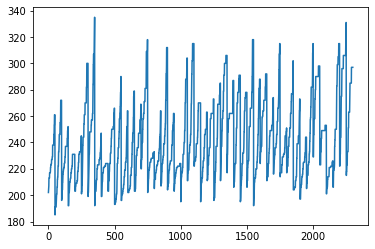

In [49]:
plt.plot(annealing_best_fit)

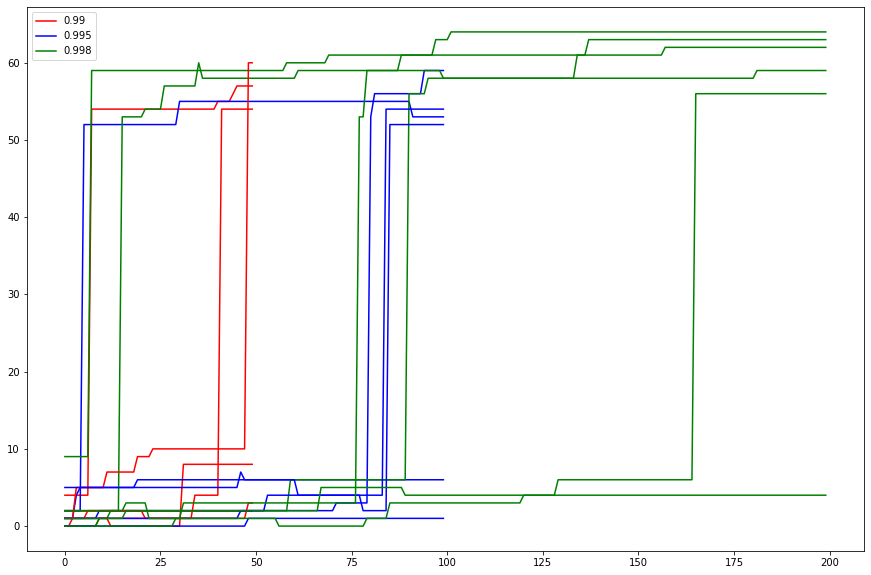

In [375]:
plt.rcParams["figure.figsize"] = (15,10)
color_list = ['red','blue', 'green','black']
no_duplicate = []
l= list(product(threshold_param_list,max_iter_list, decay_list))
for i in range(len(annealing_curve)) :
    c = 0
    while l[int(i/len(max_iter_list))][2] != decay_list[c] :
        c+=1
    color = c/len(population_list)
    if c not in no_duplicate :
        plt.plot(annealing_curve[i], color = color_list[c], label=str(decay_list[c]))
        no_duplicate.append(c)
    else : 
        plt.plot(annealing_curve[i], color = color_list[c])        
    
plt.legend()

In [222]:
## Standart testing
n_iteration = 10
durations = []
score = []
for i in (range(n_iteration)) :
            fn = mlrose.Knapsack(weights, values, max_weight_pct)
            state=np.random.randint(0,2,size=state_size)
            problem_fit = mlrose.DiscreteOpt(length = length, fitness_fn = fn, max_val = 2)
            start=time()
            best_state, best_fitness = mlrose.simulated_annealing(problem_fit,
                                                            max_attempts = 40000, 
                                                            max_iters=20000,
                                                            schedule=mlrose.GeomDecay(init_temp=1.0, decay=0.99, min_temp=0.001))
            end=time()
            durations.append(end-start)
            score.append(best_fitness)
print("Average score : ", np.mean(score))
print("Average time :  ", np.mean(durations))

Average score :  51.946903938552126
Average time :   0.9087776422500611


In [223]:
ann_score = score

# MIMIC

In [253]:
keep_list=np.linspace(0.1,.2,5)
mimic_best_state=[]
mimic_best_fit=[]
mimic_curve=[]
mimic_time=[]
print("Mimic")
threshold_param_list = [1]

Mimic


In [256]:
for threshold, keep_param in tqdm(list(product(threshold_param_list,keep_list))):
            fn=mlrose.MaxKColor(edges)
            state=np.random.randint(0,1,size=state_size)
            problem_fit=mlrose.DiscreteOpt(state_size, fn, max_val=3, maximize=False)
            start=time()
            best_state, best_fitness, curve = mlrose.mimic(problem_fit, 
                                                                   keep_pct=keep_param,
                                                                   max_attempts = 50, 
                                                                   max_iters=10, curve=True)
            end=time()
            mimic_time.append(end-start)
            mimic_best_state.append(best_state)
            mimic_best_fit.append(best_fitness)
            mimic_curve.append(curve)    



  0%|          | 0/5 [00:00<?, ?it/s]

 20%|██        | 1/5 [00:09<00:37,  9.33s/it]

 40%|████      | 2/5 [00:18<00:27,  9.27s/it]

 60%|██████    | 3/5 [00:27<00:18,  9.15s/it]

 80%|████████  | 4/5 [00:36<00:09,  9.08s/it]

100%|██████████| 5/5 [00:45<00:00,  9.09s/it]


In [119]:
plt.rcParams["figure.figsize"] = (15,10)
color_list = ['red','blue', 'green','black', 'yellow']
no_duplicate = []
l= list(product(threshold_param_list,keep_list))
for i in range(len(mimic_curve)) :
    c = 0
    while l[int(i/len(threshold_param_list))][1] != keep_list[c] :
        c+=1
    color = c
    if c not in no_duplicate :
        plt.plot(mimic_curve[i],
                 color = color_list[c],
                 label=str(keep_list[c]))
        no_duplicate.append(c)
    else : 
        plt.plot(mimic_curve[i], color = color_list[c])        
    
plt.legend()

NameError: name 'keep_list' is not defined

In [227]:
## Standart testing for MIMIC
n_iteration = 10
durations = []
score = []
for i in (range(n_iteration)) :
            fn = mlrose.Knapsack(weights, values, max_weight_pct)
            state=np.random.randint(0,2,size=state_size)
            problem_fit = mlrose.DiscreteOpt(length = length, fitness_fn = fn, max_val = 2)
            start=time()
            best_state, best_fitness, curve = mlrose.mimic(problem_fit, 
                                                                   keep_pct=0.2,
                                                                   max_attempts = 40, 
                                                                   max_iters=20, curve=True)
            end=time()
            durations.append(end-start)
            score.append(best_fitness)
print("Average score : ", np.mean(score))
print("Average time :  ", np.mean(durations))

Average score :  61.449871025004086
Average time :   2.980090093612671


In [228]:
mim_score = score

BoxPlot


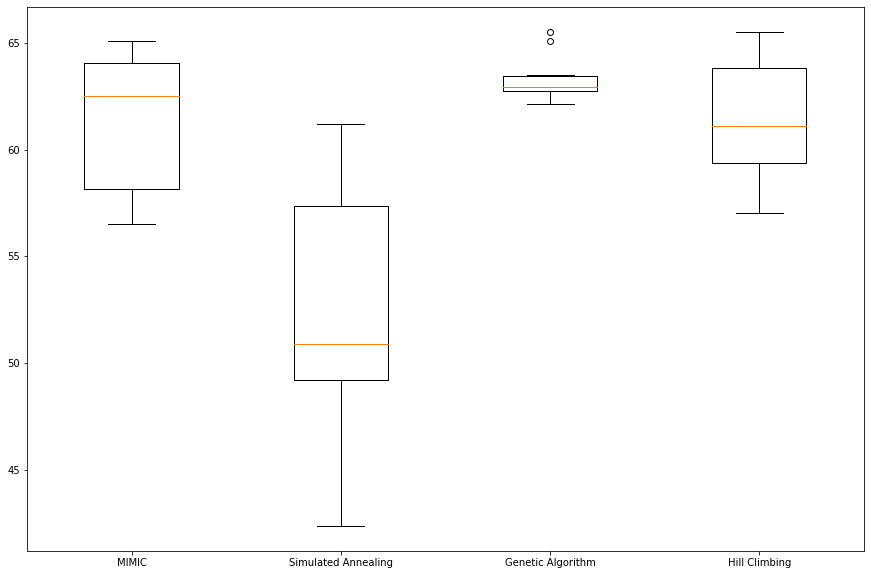

In [229]:
plt.boxplot([mim_score,ann_score, ga_score, hil_score], labels = ["MIMIC","Simulated Annealing", "Genetic Algorithm", "Hill Climbing"])
print("BoxPlot")